In [231]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

In [232]:
def initializeParameters():
    #weights and biases (3 neurons, each with 2 inputs)
    W1 = np.random.uniform(-1, 1, (3, 2))
    b1 = np.zeros((3, 1))

    #weights and biases (1 neuron, with 3 inputs from Layer 1)
    W2 = np. random.uniform(-1, 1, (1, 3))
    b2 =  np. zeros((1, 1))

    return W1, b1, W2, b2


In [233]:


def forwardPropagation(x, W1, b1, W2, b2):
    Z1 =  np.dot(W1, x) + b1
    A1 =  sigmoid(Z1)
    Z2 =  np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A1, A2


In [234]:
def sigmoidDerivative(A):
    return A * (1 - A)

In [235]:
def backwardProg(x, y, A1, A2, W1, W2):
    # error at output layer
    dZ2 = A2 - y
    dW2 =  np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)  
    # backpropagate to Layer 1
   
    dA1 =  np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoidDerivative(A1)  
    
    dW1 =  np.dot(dZ1, x.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)  # Sum across samples if batched

    return dW1, db1, dW2, db2

In [236]:
def updateParameter(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -=   learning_rate * dW1
   
    b1 -=  learning_rate * db1
    W2 -=  learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [237]:
def loss(y_true, y_pred):
   cost= (1/2) *  np.sum((y_true - y_pred) ** 2)
   return  cost

In [238]:
def ComputeCost(data, labels, W1, b1, W2, b2):
    total_loss = 0
    n = len(data)  # number of samples
    for x, y in zip(data, labels):
        _, A2 =  forwardPropagation(np.array(x).reshape(-1, 1), W1, b1, W2, b2)
        total_loss += loss(y, A2)
        total = total_loss / n 
    return total 

In [239]:
def train_model(x_train, y_train, x_valid, y_valid, epochs, initial_lr, patience=10):
    W1, b1, W2, b2 = initializeParameters()
    train_costs = []
    valid_costs = []
    best_loss = float('inf')
    no_improve_epoch = 0
    
    for epoch in range(epochs):
        lr = initial_lr #* (0.5 ** (epoch // 20))  # every 50ep
        
        for x, y in zip(x_train, y_train):
            x_array = np.array(x).reshape(-1, 1)  

            y_array = np.array(y).reshape(-1, 1) 

            A1, A2 =  forwardPropagation(x_array, W1, b1, W2, b2)
            dW1, db1, dW2, db2 =  backwardProg(x_array, y_array, A1, A2, W1, W2)
            W1, b1, W2, b2 =updateParameter(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        # Calculate loss
        train_cost =   ComputeCost(x_train, y_train, W1, b1, W2, b2)
        valid_cost =  ComputeCost(x_valid, y_valid, W1, b1, W2, b2)
        train_costs. append(train_cost)
        valid_costs.   append(valid_cost)
        
        if epoch % 50 == 0:
            print(f"epoch {epoch} : TLoss = {train_cost}, VLoss = {valid_cost}, Learning Rate = {lr}")
    return W1, b1, W2, b2, train_costs, valid_costs



In [240]:
import matplotlib.pyplot as plt
def plotCosts(train_costs, valid_costs):
    plt.figure (figsize=(10, 5))
    plt.plot(train_costs, color='red', label='Training cost')  
    plt.plot( valid_costs, label='Validation cost')
    plt.ylabel ('Cost')
    plt.xlabel('Epochs')
    plt.title ('Training and Validation Cost')
    plt.legend()
    plt.show()

In [241]:
import matplotlib.pyplot as plt
def plotPredictions(x_test, y_test, W1, b1, W2, b2):
    predictions = []
    for x in x_test:
        x_array = np.array(x).reshape(-1, 1)
        _, pred = forwardPropagation(x_array, W1, b1, W2, b2)
        predictions.append(pred.item())

    plt.figure (figsize=(10, 5))
    plt.scatter([y for y in y_test], predictions, alpha=0.5)
    plt.xlabel ('True Values')
    plt.ylabel ('Predicted Values')
    plt.title('True and Predicted Outputs')
    plt.show()

epoch 0 : TLoss = 0.02285124303661125, VLoss = 0.021734911443213708, Learning Rate = 0.01
epoch 50 : TLoss = 0.01993105712319435, VLoss = 0.01888281108973425, Learning Rate = 0.01
epoch 100 : TLoss = 0.00858494837773228, VLoss = 0.007749837553875379, Learning Rate = 0.01
epoch 150 : TLoss = 0.003582700589125503, VLoss = 0.003375974300119492, Learning Rate = 0.01
epoch 200 : TLoss = 0.003314770587589571, VLoss = 0.003356682712683686, Learning Rate = 0.01
epoch 250 : TLoss = 0.0033065108579493335, VLoss = 0.0034129376209609467, Learning Rate = 0.01
epoch 300 : TLoss = 0.0033027569382508854, VLoss = 0.003428698714751418, Learning Rate = 0.01
epoch 350 : TLoss = 0.0032984588267849922, VLoss = 0.0034330711142009757, Learning Rate = 0.01
epoch 400 : TLoss = 0.0032941672471382996, VLoss = 0.003434653431205869, Learning Rate = 0.01
epoch 450 : TLoss = 0.0032900270326044114, VLoss = 0.0034355874716764903, Learning Rate = 0.01
epoch 500 : TLoss = 0.0032860543941384684, VLoss = 0.0034364160508544

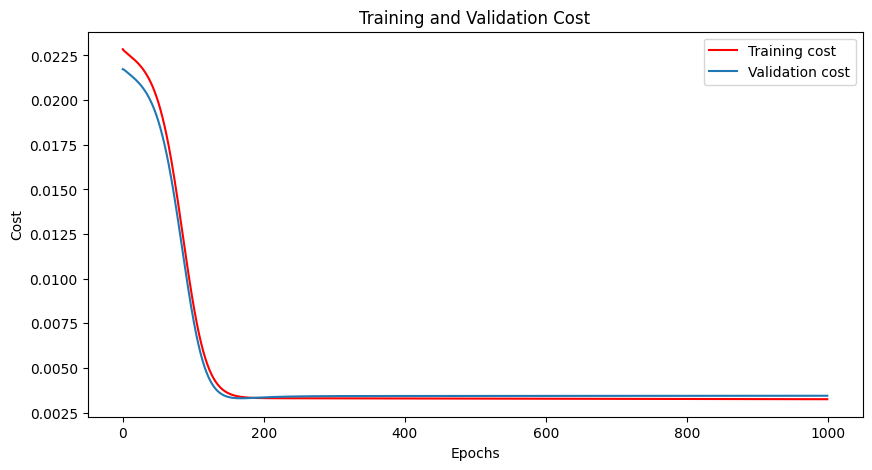

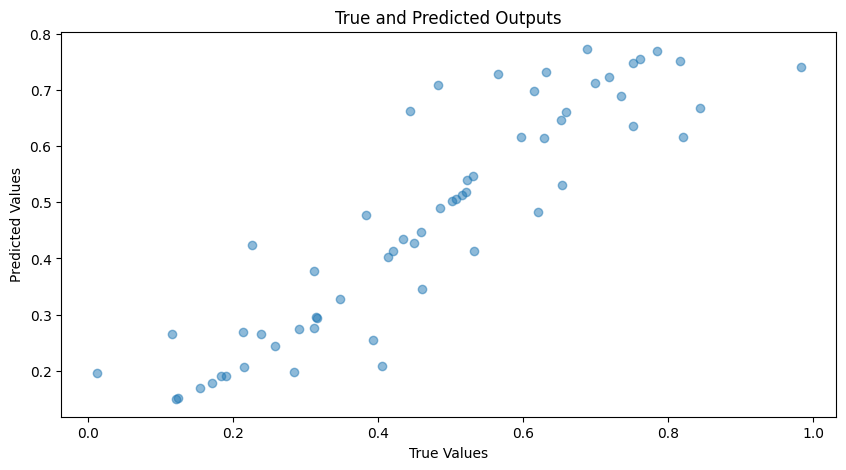

In [242]:
W1, b1, W2, b2, train_costs, valid_costs = train_model(x_train, y_train, x_valid, y_valid, 1000, 0.01)
plotCosts(train_costs, valid_costs)
plotPredictions(x_test, y_test, W1, b1, W2, b2)